In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import clear_output
stopwords = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/stopwords.pickle')

In [11]:
headings = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/scraping/headingsfromhnandbc101.pickle')
paragraphs = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/scraping/paragraphsfromhnandbc101.pickle')

In [34]:
headings.head(30)

,tag,headingtext,subheading,nextheading,paragraphs
0,topic,Is Blockchain-Based Watch-to-Earn Monetization...,2,None,[]
1,h3,@ishantechIshanOnTech,None,None,[0]
2,h2,What Is Happening?,None,3,[1]
3,h2,What is Coub.com?,None,4,"[2, 3]"
4,h2,How is Coubâs Web3 Video Space Going to Work?,None,5,"[4, 5, 6, 7]"
5,h2,How is this Web3 Video Platform going to help ...,None,6,"[8, 9]"
6,h2,Final Thoughts on Web3 Video platforms?,None,None,"[10, 11, 12]"
7,topic,Pros and Cons of Development On Polygon,9,None,[]
8,h3,@serkhitrovSergei Khitrov,None,None,"[13, 14]"
9,h2,How Polygon solves Ethereum's scalability problem,None,10,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"


In [40]:
hid = 27

In [49]:
while True:
    
    hvector = CountVectorizer(analyzer='word', ngram_range=(1, 3))
    h = hvector.fit_transform([headings.iloc[hid]['headingtext']])
    hvocab = hvector.vocabulary_
    
    cvector = CountVectorizer(vocabulary=hvocab, ngram_range=(1, 3))
    c = cvector.fit_transform(headings['headingtext'])
    c = cvector.transform(paragraphs['text'])
    ccount = c.toarray()
    
    hid+=1
    break

In [50]:
sum_ = sum(ccount)

In [51]:
sum_

array([  8667,   1487,    262,   7112, 182784,     26,      2, 322869,
        67345,    827, 648653,   4792,   1332,   4173,   2151,     22,
            3])

In [54]:
graphlist = []
for i in hvocab:
    temp = i.split(' ')
    test = [1 for x in temp if x in list(stopwords['Word'])]
    if len(temp)==sum(test):
        continue
    print(i, sum_[hvocab[i]])
    graphlist.append([i, sum_[hvocab[i]]])

web3 2151
future 8667
internet 7112
is web3 26
web3 the 22
the future 4792
future of 1487
the internet 4173
is web3 the 2
web3 the future 3
the future of 1332
future of the 262
of the internet 827


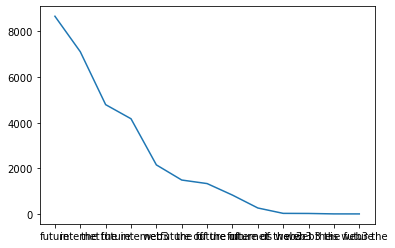

In [55]:
import matplotlib.pyplot as plt
def get2(a):
    return a[1]

XY = sorted(graphlist, key=get2, reverse=True)
X = [a[0] for a in XY]
Y = [a[1] for a in XY]
plt.plot(X, Y)
# plt.title('Unemployment Rate Vs Year')
# plt.xlabel('Year')
# plt.ylabel('Unemployment Rate')
plt.show()